In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
DATA_DIR = './climate_data/'

In [3]:
for file in os.listdir(DATA_DIR):
    print(file)

climate.csv
en_climate_daily_ON_6158355_2019_P1D.csv
en_climate_hourly_ON_6158355_01-2019_P1H.csv
en_climate_hourly_ON_6158355_02-2019_P1H.csv
en_climate_hourly_ON_6158355_03-2019_P1H.csv
en_climate_hourly_ON_6158355_04-2019_P1H.csv
en_climate_hourly_ON_6158355_05-2019_P1H.csv
en_climate_hourly_ON_6158355_06-2019_P1H.csv
en_climate_hourly_ON_6158355_07-2019_P1H.csv
en_climate_hourly_ON_6158355_08-2019_P1H.csv
en_climate_hourly_ON_6158355_09-2019_P1H.csv
en_climate_hourly_ON_6158355_10-2019_P1H.csv
en_climate_hourly_ON_6158355_11-2019_P1H.csv
en_climate_hourly_ON_6158355_12-2019_P1H.csv
en_climate_hourly_ON_6158355_12-2020_P1H.csv
en_climate_hourly_ON_6158359_01-2019_P1H.csv
en_climate_hourly_ON_6158359_02-2019_P1H.csv
en_climate_hourly_ON_6158359_03-2019_P1H.csv
en_climate_hourly_ON_6158359_04-2019_P1H.csv
en_climate_hourly_ON_6158359_05-2019_P1H.csv
en_climate_hourly_ON_6158359_06-2019_P1H.csv
en_climate_hourly_ON_6158359_07-2019_P1H.csv
en_climate_hourly_ON_6158359_08-2019_P1H.csv
en

## Data Loading

In [4]:
df = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158359_01-2019_P1H.csv')
for i in range(2,13):
    cur_df = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158359_{:0>2d}-2019_P1H.csv'.format(i))
    df = pd.concat([df, cur_df], ignore_index=True)
assert 24 * 365 == len(df) # 24 hours for a year

In [5]:
# Toronto City
df_city = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158355_01-2019_P1H.csv')
for i in range(2,13):
    cur_df = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158355_{:0>2d}-2019_P1H.csv'.format(i))
    df_city = pd.concat([df_city, cur_df], ignore_index=True)
assert 24 * 365 == len(df) # 24 hours for a year

In [6]:
# Toronto International Airport
df_intl = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158731_01-2019_P1H.csv')
for i in range(2,13):
    cur_df = pd.read_csv(DATA_DIR+'en_climate_hourly_ON_6158731_{:0>2d}-2019_P1H.csv'.format(i))
    df_intl = pd.concat([df_intl, cur_df], ignore_index=True)
assert 24 * 365 == len(df) # 24 hours for a year

In [7]:
# daily data
df_daily = pd.read_csv(DATA_DIR+'en_climate_daily_ON_6158355_2019_P1D.csv')

## Data Exploration 

In [8]:
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_city.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2019-01-01 00:00,2019,1,1,00:00,5.1,...,M,NaN,NaN,97.99,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2019-01-01 01:00,2019,1,1,01:00,6.2,...,M,NaN,NaN,97.99,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2019-01-01 02:00,2019,1,1,02:00,5.6,...,M,NaN,NaN,98.13,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2019-01-01 03:00,2019,1,1,03:00,3.2,...,M,NaN,NaN,98.53,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2019-01-01 04:00,2019,1,1,04:00,2.7,...,M,NaN,NaN,98.81,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_intl.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 00:00,2019,1,1,00:00,4.5,...,NaN,6.4,NaN,97.29,NaN,NaN,NaN,NaN,NaN,"Drizzle,Fog"
1,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 01:00,2019,1,1,01:00,4.4,...,NaN,9.7,NaN,97.32,NaN,NaN,NaN,NaN,NaN,"Drizzle,Fog"
2,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 02:00,2019,1,1,02:00,2.4,...,NaN,9.7,NaN,97.54,NaN,NaN,NaN,NaN,NaN,"Rain,Drizzle,Fog"
3,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 03:00,2019,1,1,03:00,2.2,...,NaN,19.3,NaN,97.89,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.63,43.68,TORONTO INTL A,6158731,2019-01-01 04:00,2019,1,1,04:00,1.9,...,NaN,24.1,NaN,98.16,NaN,NaN,NaN,NaN,NaN,Cloudy


In [11]:
df.describe()

,Longitude (x),Latitude (y),Climate ID,Year,Month,Day,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag
count,8.760000e+03,8.760000e+03,8760.0,8760.0,8760.000000,8760.000000,8665.000000,8615.000000,8615.000000,8165.000000,8737.000000,8736.000000,8663.000000,1152.000000,0.0,1824.000000,0.0
mean,-7.940000e+01,4.363000e+01,6158359.0,2019.0,6.526027,15.720548,8.325470,3.808160,74.540685,19.358604,17.522147,14.862500,100.713891,28.826389,NaN,-11.847039,NaN
std,1.294683e-11,3.659504e-12,0.0,0.0,3.448048,8.796749,10.050682,10.255228,14.261275,10.062665,11.045413,3.428047,0.812610,2.877650,NaN,6.159354,NaN
min,-7.940000e+01,4.363000e+01,6158359.0,2019.0,1.000000,1.000000,-21.000000,-28.400000,24.000000,1.000000,0.000000,0.000000,97.760000,25.000000,NaN,-36.000000,NaN
25%,-7.940000e+01,4.363000e+01,6158359.0,2019.0,4.000000,8.000000,1.000000,-3.700000,65.000000,8.000000,9.000000,16.100000,100.190000,27.000000,NaN,-15.000000,NaN
50%,-7.940000e+01,4.363000e+01,6158359.0,2019.0,7.000000,16.000000,7.800000,4.100000,75.000000,22.000000,15.000000,16.100000,100.710000,28.000000,NaN,-11.000000,NaN
75%,-7.940000e+01,4.363000e+01,6158359.0,2019.0,10.000000,23.000000,17.500000,12.000000,86.000000,28.000000,24.000000,16.100000,101.270000,31.000000,NaN,-7.000000,NaN
max,-7.940000e+01,4.363000e+01,6158359.0,2019.0,12.000000,31.000000,33.200000,23.900000,100.000000,36.000000,68.000000,16.100000,103.260000,43.000000,NaN,-2.000000,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude (x)        8760 non-null   float64
 1   Latitude (y)         8760 non-null   float64
 2   Station Name         8760 non-null   object 
 3   Climate ID           8760 non-null   int64  
 4   Date/Time            8760 non-null   object 
 5   Year                 8760 non-null   int64  
 6   Month                8760 non-null   int64  
 7   Day                  8760 non-null   int64  
 8   Time                 8760 non-null   object 
 9   Temp (°C)            8665 non-null   float64
 10  Temp Flag            79 non-null     object 
 11  Dew Point Temp (°C)  8615 non-null   float64
 12  Dew Point Temp Flag  129 non-null    object 
 13  Rel Hum (%)          8615 non-null   float64
 14  Rel Hum Flag         129 non-null    object 
 15  Wind Dir (10s deg)   8165 non-null   f

In [13]:
df_daily.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2019-01-01,2019,1,1,NaN,6.3,...,NaN,NaN,0.4,NaN,0.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2019-01-02,2019,1,2,NaN,0.6,...,NaN,NaN,2.9,NaN,0.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2019-01-03,2019,1,3,NaN,1.5,...,NaN,NaN,0.0,NaN,5.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2019-01-04,2019,1,4,NaN,7.8,...,NaN,NaN,0.0,NaN,4.0,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2019-01-05,2019,1,5,NaN,3.9,...,NaN,NaN,0.0,NaN,1.0,NaN,NaN,M,NaN,M


In [14]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              365 non-null    float64
 1   Latitude (y)               365 non-null    float64
 2   Station Name               365 non-null    object 
 3   Climate ID                 365 non-null    int64  
 4   Date/Time                  365 non-null    object 
 5   Year                       365 non-null    int64  
 6   Month                      365 non-null    int64  
 7   Day                        365 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              3 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              3 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

### Tempature

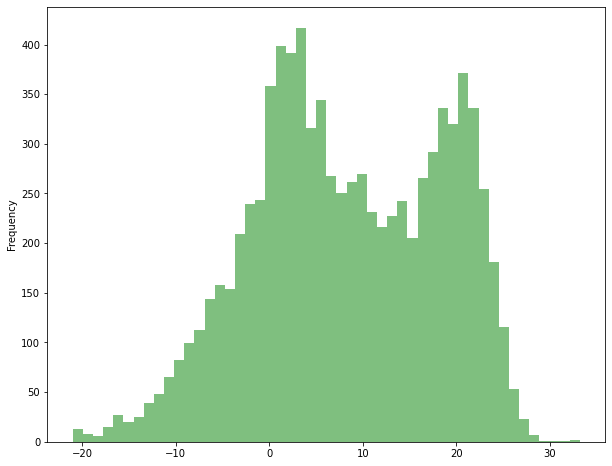

In [15]:
# frequency
plt.figure(figsize=(10,8))
df['Temp (°C)'].plot.hist(color='g', alpha=0.5, bins=50)
plt.show()

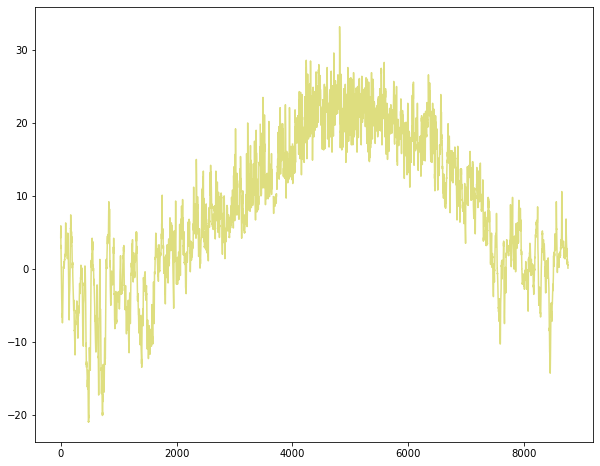

In [16]:
# time series
plt.figure(figsize=(10,8))
df['Temp (°C)'].plot(color='y', alpha=0.5)
plt.show()

In [17]:
# null Temp
df[df['Temp (°C)'].isnull()].head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
1877,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-03-20 05:00,2019,3,20,05:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3393,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-05-22 09:00,2019,5,22,09:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3394,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-05-22 10:00,2019,5,22,10:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3395,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-05-22 11:00,2019,5,22,11:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3396,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-05-22 12:00,2019,5,22,12:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


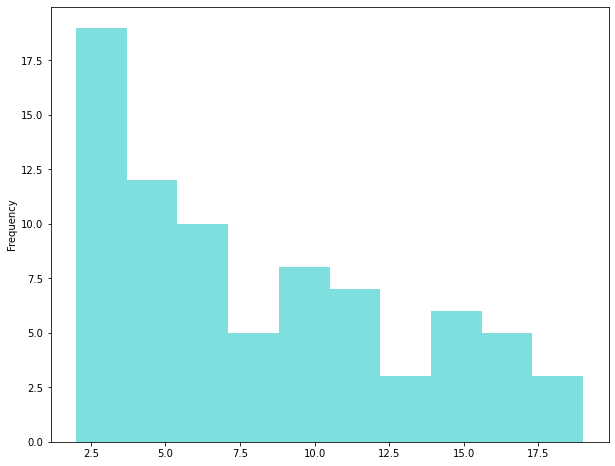

In [18]:
# consecutive NaN
consecutive = df['Temp (°C)'].isnull().astype(int).groupby(df['Temp (°C)'].notnull().astype(int).cumsum()).cumsum()
consecutive.drop(df[consecutive < 2].index, inplace=True)
plt.figure(figsize=(10,8))
consecutive.plot.hist(color='c', alpha=0.5)
plt.show()

In [19]:
# difference
max_diff = np.max(df['Temp (°C)'] - df_city['Temp (°C)'])
print('Max: ', max_diff)
min_diff = np.min(df['Temp (°C)'] - df_city['Temp (°C)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Temp (°C)'] - df_city['Temp (°C)'])
print('Avg:', avg_diff)

Max:  4.5
Min:  -9.9
Avg: -0.5793183131138077


In [20]:
# fill null
df['Temp (°C)'] = df['Temp (°C)'].bfill(inplace=False, limit=4)
for i in df[df['Temp (°C)'].isnull()].index:
    df.loc[i, 'Temp (°C)'] = df_city.loc[i, 'Temp (°C)'] + avg_diff
df.drop(columns=['Temp Flag'], inplace=True)

In [21]:
df[df['Temp (°C)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather


###  Dew Point Tempature

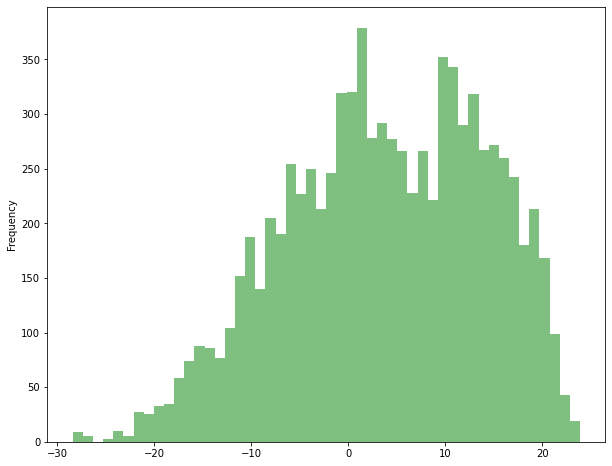

In [22]:
# frequency
plt.figure(figsize=(10,8))
df['Dew Point Temp (°C)'].plot.hist(color='g', alpha=0.5, bins=50)
plt.show()

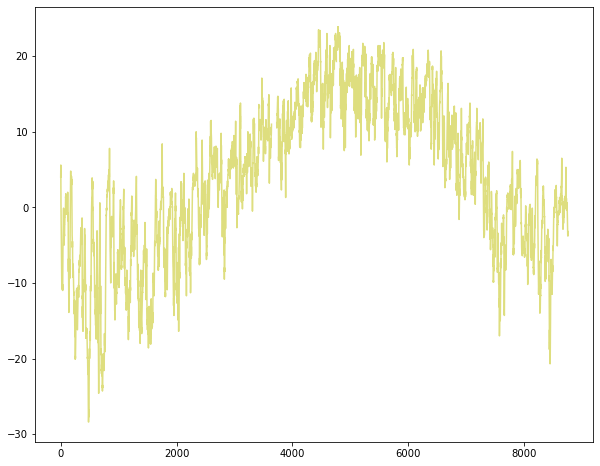

In [23]:
# time series
plt.figure(figsize=(10,8))
df['Dew Point Temp (°C)'].plot(color='y', alpha=0.5)
plt.show()

In [24]:
# difference
max_diff = np.max(df['Dew Point Temp (°C)'] - df_city['Dew Point Temp (°C)'])
print('Max: ', max_diff)
min_diff = np.min(df['Dew Point Temp (°C)'] - df_city['Dew Point Temp (°C)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Dew Point Temp (°C)'] - df_city['Dew Point Temp (°C)'])
print('Avg:', avg_diff)

Max:  12.7
Min:  -4.600000000000001
Avg: 1.5729110981987184


In [25]:
# fill null
for i in df[df['Dew Point Temp (°C)'].isnull()].index:
    df.loc[i, 'Dew Point Temp (°C)'] = df_city.loc[i, 'Dew Point Temp (°C)'] + avg_diff
df.drop(columns=['Dew Point Temp Flag'], inplace=True)

In [26]:
df[df['Dew Point Temp (°C)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather


### Relative Humidity

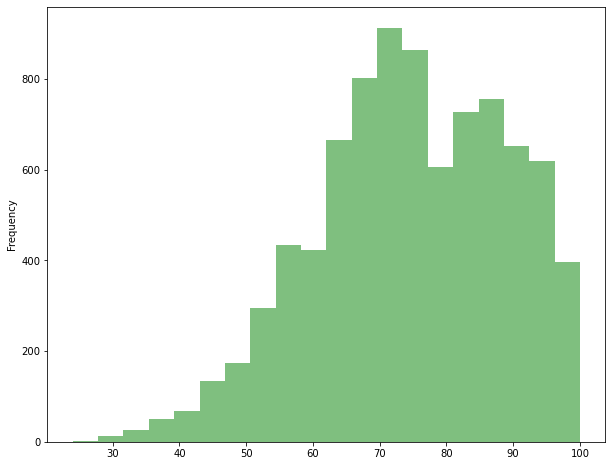

In [27]:
# frequency
plt.figure(figsize=(10,8))
df['Rel Hum (%)'].plot.hist(color='g', alpha=0.5, bins=20)
plt.show()

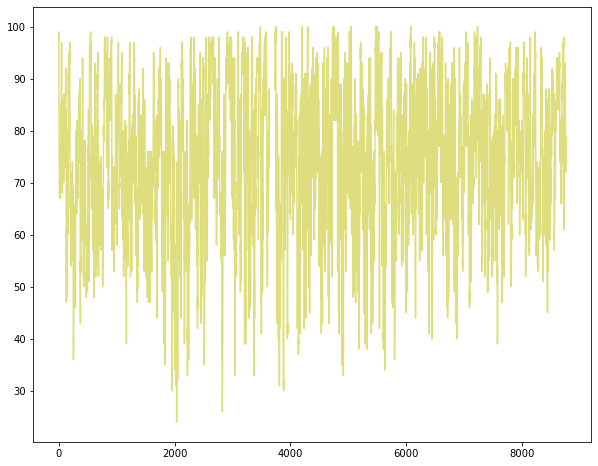

In [28]:
# time series
plt.figure(figsize=(10,8))
df['Rel Hum (%)'].plot(color='y', alpha=0.5)
plt.show()

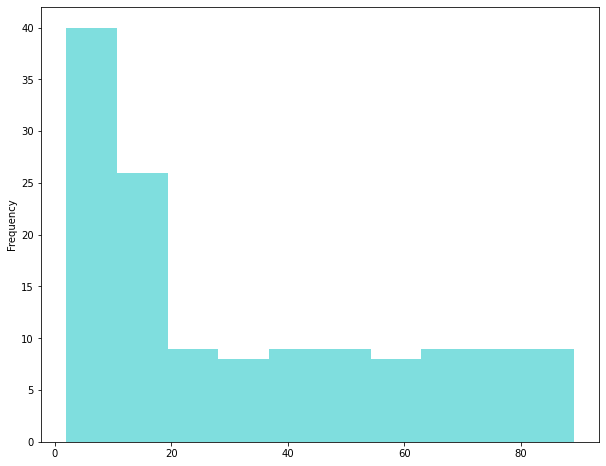

In [29]:
# consecutive NaN
consecutive = df['Rel Hum (%)'].isnull().astype(int).groupby(df['Rel Hum (%)'].notnull().astype(int).cumsum()).cumsum()
consecutive.drop(df[consecutive < 2].index, inplace=True)
plt.figure(figsize=(10,8))
consecutive.plot.hist(color='c', alpha=0.5)
plt.show()

In [30]:
# difference
max_diff = np.max(df['Rel Hum (%)'] - df_city['Rel Hum (%)'])
print('Max: ', max_diff)
min_diff = np.min(df['Rel Hum (%)'] - df_city['Rel Hum (%)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Rel Hum (%)'] - df_city['Rel Hum (%)'])
print('Avg:', avg_diff)

Max:  53.0
Min:  -25.0
Avg: 9.307030796048808


In [31]:
# fill null
df['Rel Hum (%)'] = df['Rel Hum (%)'].bfill(inplace=False)
df.drop(columns=['Rel Hum Flag'], inplace=True)

In [32]:
df[df['Rel Hum (%)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather


###  Wind Direction

In [33]:
# drop
df.drop(columns=['Wind Dir (10s deg)'], inplace=True)
df.drop(columns=['Wind Dir Flag'], inplace=True)

### Wind Speed

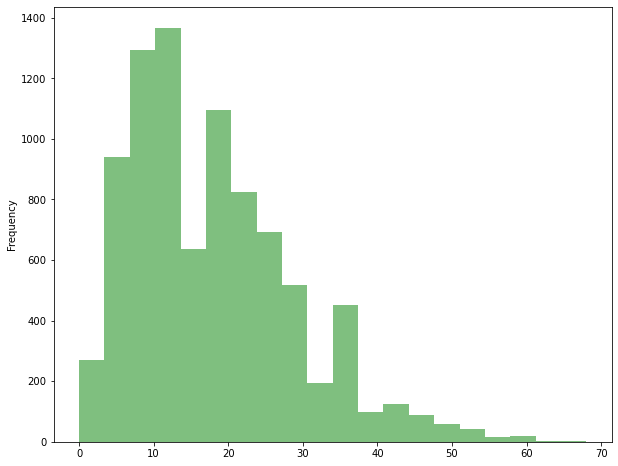

In [34]:
# frequency
plt.figure(figsize=(10,8))
df['Wind Spd (km/h)'].plot.hist(color='g', alpha=0.5, bins=20)
plt.show()

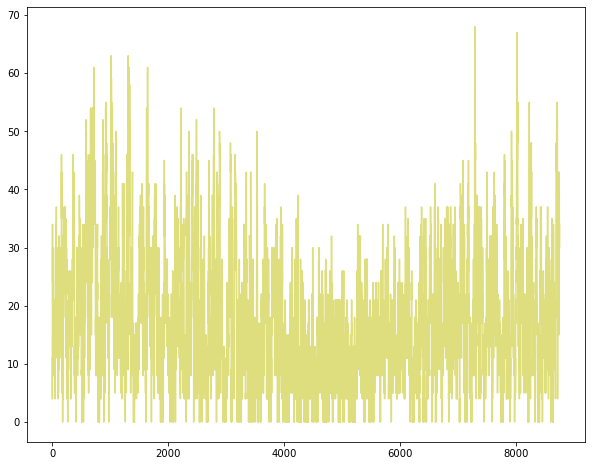

In [35]:
# time series
plt.figure(figsize=(10,8))
df['Wind Spd (km/h)'].plot(color='y', alpha=0.5)
plt.show()

In [36]:
# difference
max_diff = np.max(df['Stn Press (kPa)'] - df_intl['Stn Press (kPa)'])
print('Max: ', max_diff)
min_diff = np.min(df['Stn Press (kPa)'] - df_intl['Stn Press (kPa)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Stn Press (kPa)'] - df_intl['Stn Press (kPa)'])
print('Avg:', avg_diff)

Max:  1.3400000000000034
Min:  1.0100000000000051
Avg: 1.1738847841145046


In [37]:
# fill null
# fill null
for i in df[df['Wind Spd (km/h)'].isnull()].index:
    df.loc[i, 'Wind Spd (km/h)'] = df_city.loc[i, 'Stn Press (kPa)'] + avg_diff
df.drop(columns=['Wind Spd Flag'], inplace=True)

In [38]:
df[df['Wind Spd (km/h)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd (km/h),Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather


### Visibility (km)

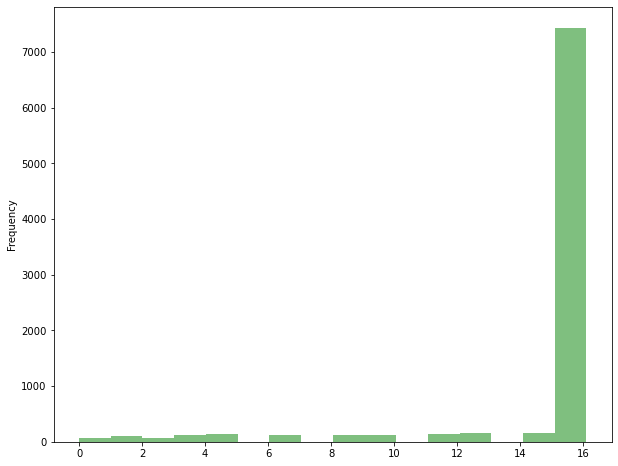

In [39]:
# frequency
plt.figure(figsize=(10,8))
df['Visibility (km)'].plot.hist(color='g', alpha=0.5, bins=16)
plt.show()

In [40]:
# difference
max_diff = np.max(df['Visibility (km)'] - df_intl['Visibility (km)'])
print('Max: ', max_diff)
min_diff = np.min(df['Visibility (km)'] - df_intl['Visibility (km)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Visibility (km)'] - df_intl['Visibility (km)'])
print('Avg:', avg_diff)

Max:  15.500000000000002
Min:  -64.4
Avg: -6.855615340583825


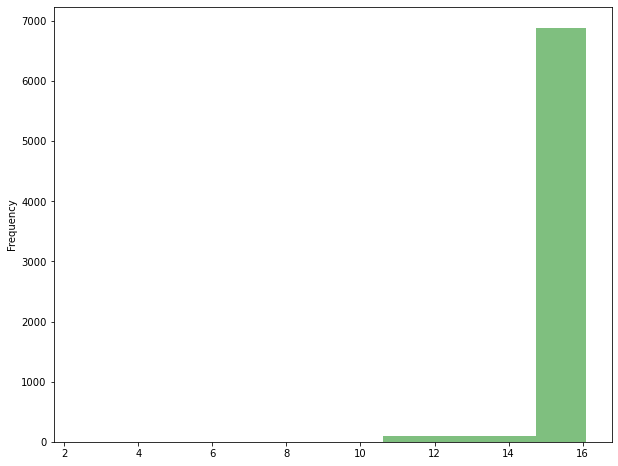

In [41]:
# frequency when weather is nan
plt.figure(figsize=(10,8))
df[df['Weather'].isnull()]['Visibility (km)'].plot.hist(color='g', alpha=0.5)
plt.show()

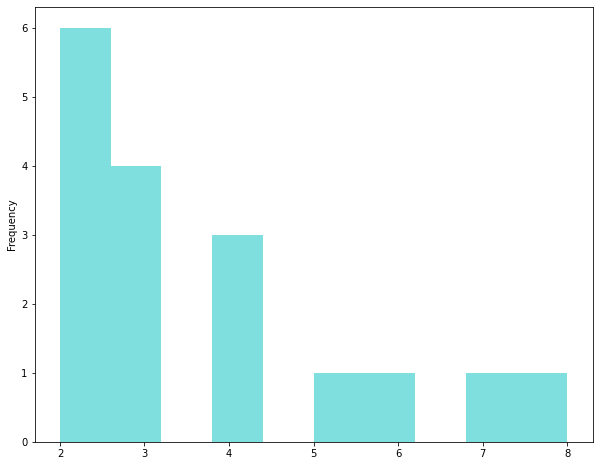

In [42]:
# consecutive NaN
consecutive = df['Visibility (km)'].isnull().astype(int).groupby(df['Visibility (km)'].notnull().astype(int).cumsum()).cumsum()
consecutive.drop(df[consecutive < 2].index, inplace=True)
plt.figure(figsize=(10,8))
consecutive.plot.hist(color='c', alpha=0.5)
plt.show()

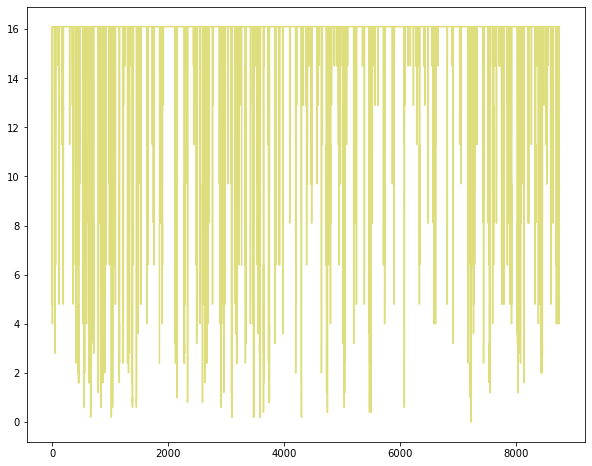

In [43]:
# time series
plt.figure(figsize=(10,8))
df['Visibility (km)'].plot(color='y', alpha=0.5)
plt.show()

In [44]:
df['Visibility (km)'] = df['Visibility (km)'].bfill(inplace=False, limit=4)
df.loc[df['Visibility (km)'].isnull(), 'Visibility (km)'] = 16.1

In [45]:
# drop
df.drop(columns=['Visibility Flag'], inplace=True)

### Standard Press

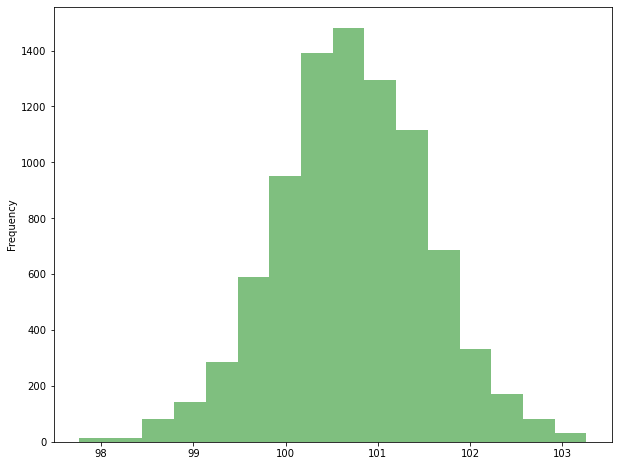

In [46]:
# frequency
plt.figure(figsize=(10,8))
df['Stn Press (kPa)'].plot.hist(color='g', alpha=0.5, bins=16)
plt.show()

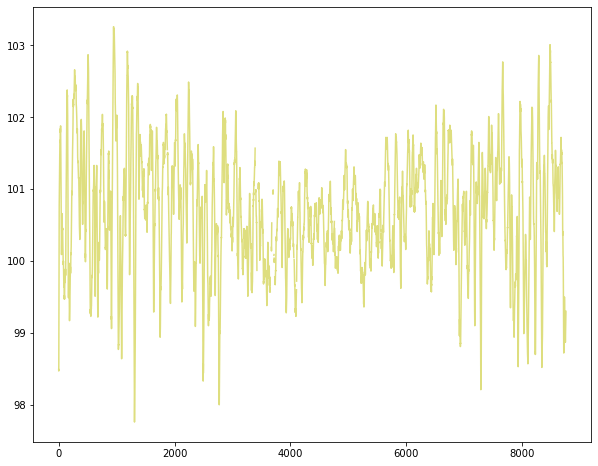

In [47]:
# time series
plt.figure(figsize=(10,8))
df['Stn Press (kPa)'].plot(color='y', alpha=0.5)
plt.show()

In [48]:
# difference
max_diff = np.max(df['Stn Press (kPa)'] - df_city['Stn Press (kPa)'])
print('Max: ', max_diff)
min_diff = np.min(df['Stn Press (kPa)'] - df_city['Stn Press (kPa)'])
print('Min: ', min_diff)
avg_diff = np.mean(df['Stn Press (kPa)'] - df_city['Stn Press (kPa)'])
print('Avg:', avg_diff)

Max:  0.5799999999999983
Min:  0.35999999999999943
Avg: 0.4614989021148597


In [49]:
# fill null
for i in df[df['Stn Press (kPa)'].isnull()].index:
    df.loc[i, 'Stn Press (kPa)'] = df_city.loc[i, 'Stn Press (kPa)'] + avg_diff
df.drop(columns=['Stn Press Flag'], inplace=True)

In [50]:
df[df['Stn Press (kPa)'].isnull()]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather


### Humidex

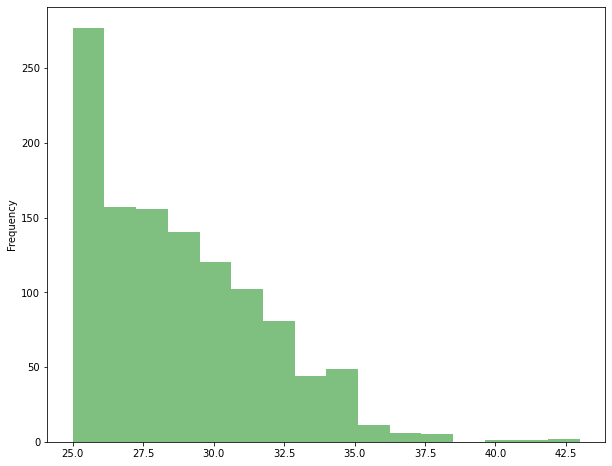

In [51]:
# frequency
plt.figure(figsize=(10,8))
df['Hmdx'].plot.hist(color='g', alpha=0.5, bins=16)
plt.show()

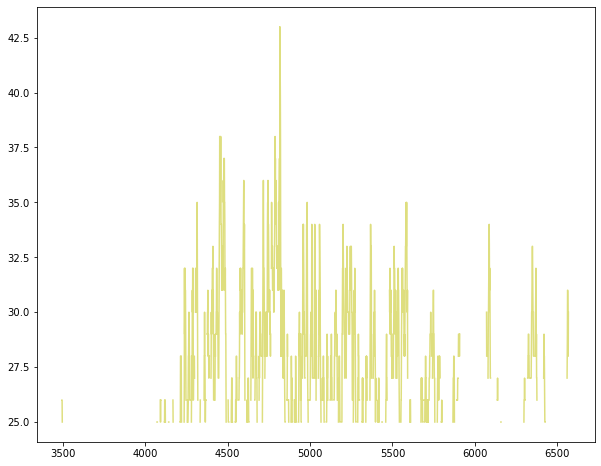

In [52]:
# time series
plt.figure(figsize=(10,8))
df['Hmdx'].plot(color='y', alpha=0.5)
plt.show()

In [53]:
# drop
df.drop(columns=['Hmdx'], inplace=True)
df.drop(columns=['Hmdx Flag'], inplace=True)

### Wind Chill

In [54]:
# drop
df.drop(columns=['Wind Chill'], inplace=True)
df.drop(columns=['Wind Chill Flag'], inplace=True)

### Weather

In [55]:
# compare
df['Intl Weather'] = df_intl['Weather']
df[df_intl['Weather'].notnull()].to_csv(DATA_DIR+'weather_compared.csv', index=False)
df.drop(columns=['Intl Weather'], inplace=True)

In [56]:
# get multiple dummies
df['Weather'] = df['Weather'].apply(lambda x: x.split(',') if pd.notnull(x) else [])
df_weather = pd.get_dummies(df['Weather'].apply(pd.Series).stack()).sum(level=0)
df = df.join(df_weather)
df.drop(columns=['Weather'], inplace=True)

In [57]:
# fill nan
df.fillna(0, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude (x)        8760 non-null   float64
 1   Latitude (y)         8760 non-null   float64
 2   Station Name         8760 non-null   object 
 3   Climate ID           8760 non-null   int64  
 4   Date/Time            8760 non-null   object 
 5   Year                 8760 non-null   int64  
 6   Month                8760 non-null   int64  
 7   Day                  8760 non-null   int64  
 8   Time                 8760 non-null   object 
 9   Temp (°C)            8760 non-null   float64
 10  Dew Point Temp (°C)  8760 non-null   float64
 11  Rel Hum (%)          8760 non-null   float64
 12  Wind Spd (km/h)      8760 non-null   float64
 13  Visibility (km)      8760 non-null   float64
 14  Stn Press (kPa)      8760 non-null   float64
 15  Blowing Snow         8760 non-null   f

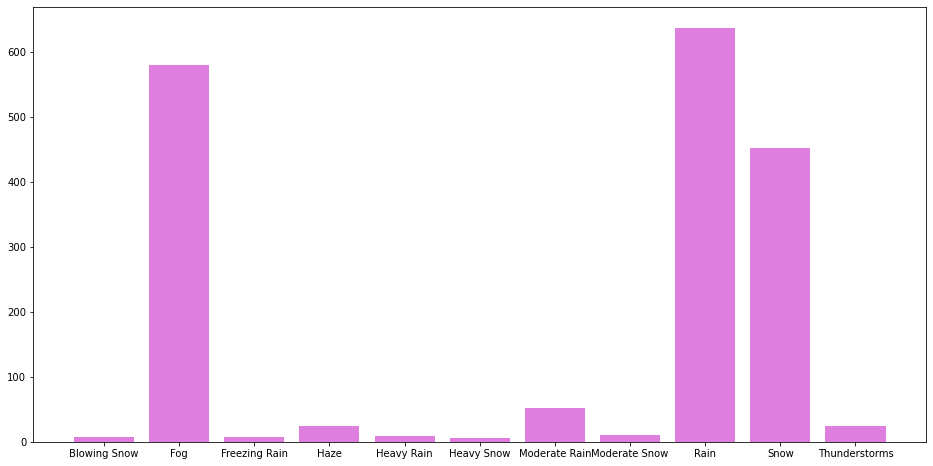

In [59]:
wtr_dic = {}
x, y = [], []
for i, w in enumerate(df.columns[15:]):
    x.append(w)
    y.append(df[w].sum())
plt.figure(figsize=(16,8))
plt.bar(x, y, color='m', alpha=0.5)
plt.show()

### Snow on Ground 

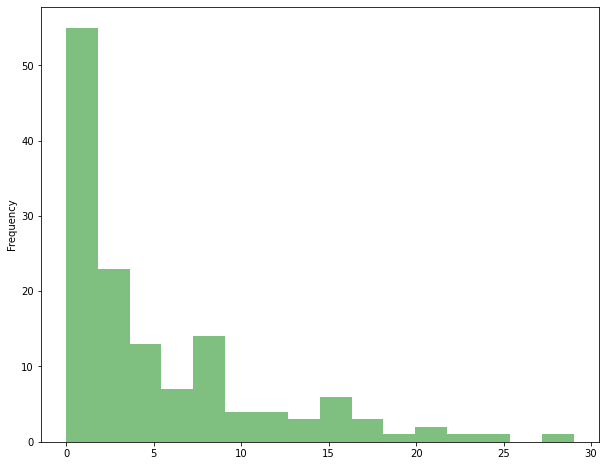

In [60]:
# frequency
plt.figure(figsize=(10,8))
df_daily['Snow on Grnd (cm)'].plot.hist(color='g', alpha=0.5, bins=16)
plt.show()

In [61]:
# fill nan
df_daily['Snow on Grnd (cm)'].fillna(0, inplace=True)

In [62]:
# merge Snow on Grnd
df_daily = df_daily[['Month', 'Day', 'Snow on Grnd (cm)']]
df = pd.merge(df, df_daily,  how='left', left_on=['Month', 'Day'], right_on=['Month', 'Day'])

## Save to CSV 

In [63]:
df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Freezing Rain,Haze,Heavy Rain,Heavy Snow,Moderate Rain,Moderate Snow,Rain,Snow,Thunderstorms,Snow on Grnd (cm)
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude (x)        8760 non-null   float64
 1   Latitude (y)         8760 non-null   float64
 2   Station Name         8760 non-null   object 
 3   Climate ID           8760 non-null   int64  
 4   Date/Time            8760 non-null   object 
 5   Year                 8760 non-null   int64  
 6   Month                8760 non-null   int64  
 7   Day                  8760 non-null   int64  
 8   Time                 8760 non-null   object 
 9   Temp (°C)            8760 non-null   float64
 10  Dew Point Temp (°C)  8760 non-null   float64
 11  Rel Hum (%)          8760 non-null   float64
 12  Wind Spd (km/h)      8760 non-null   float64
 13  Visibility (km)      8760 non-null   float64
 14  Stn Press (kPa)      8760 non-null   float64
 15  Blowing Snow         8760 non-null   f

In [65]:
df.drop(columns=['Longitude (x)', 'Latitude (y)', 'Station Name'], inplace=True)
df.to_csv(DATA_DIR+'climate.csv', index=False)